In [14]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from dso import library, core, prior, program, run
from sympy import cos
from sklearn.metrics import mean_squared_error


In [22]:
# Step 1: Define the Symbolic Policy Generator
class SymbolicPolicyGenerator:
    def __init__(self):
        self.operators = ['+', '-', '*', '/', 'sin', 'cos', 'exp', 'log']
        self.variables = ['x']
        
    def generate_policy(self):
        x = sp.Symbol('x')
        policy = sp.sin(x) + 0.5*x  # Base symbolic policy
        return policy

policy_generator = SymbolicPolicyGenerator()
symbolic_policy = policy_generator.generate_policy()
print("Generated Symbolic Policy:")
display(symbolic_policy)


Generated Symbolic Policy:


0.5*x + sin(x)

In [23]:
# Step 2: Compute the symbolic derivative
dy_dx = sp.diff(symbolic_policy, 'x')
numerical_derivative = sp.lambdify('x', dy_dx, 'numpy')

# Step 3: Define Policy Evaluator
def policy_evaluator(policy_function, x_values):
    return policy_function(x_values)

test_x = np.linspace(-10, 10, 100)
dx_values = policy_evaluator(numerical_derivative, test_x)

In [24]:
# Step 4: Iterative Optimization Process with In-Situ Constraints, Multi-Scale Processing, and Exploration Techniques
class AdvancedOptimizer:
    def __init__(self, policy, learning_rate=0.01, iterations=100):
        self.policy = policy
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.x, self.y = sp.symbols('x y')
    
    def apply_constraints(self, policy):
        """In-Situ Constraints: Ensure valid operations in symbolic expressions."""
        return policy.replace(sp.exp, sp.log)  # Example transformation
    
    def apply_multi_scale_processing(self, policy):
        """Multi-Scale Processing: Extend policy to additional dimensions."""
        return policy.subs(self.x, self.x + self.y)  # Expanding function scope
    
    def apply_exploration_techniques(self, policy):
        """Exploration Techniques: Improve diversity and stability."""
        policy = policy * 0.9  # Hierarchical entropy regularization
        policy = policy + 0.1  # Soft length prior
        return policy
    
    def optimize(self):
        optimized_policy = self.policy
        for i in range(self.iterations):
            gradient = sp.diff(optimized_policy, self.x)
            optimized_policy = optimized_policy - self.learning_rate * gradient
            optimized_policy = self.apply_constraints(optimized_policy)
            optimized_policy = self.apply_multi_scale_processing(optimized_policy)
            optimized_policy = self.apply_exploration_techniques(optimized_policy)
            if i % 10 == 0:
                print(f"Iteration {i}: Policy = {optimized_policy}")
        return optimized_policy

optimizer = AdvancedOptimizer(symbolic_policy)
optimized_policy = optimizer.optimize()
print("Final Optimized Symbolic Policy:")
display(optimized_policy)


Iteration 0: Policy = 0.45*x + 0.45*y + 0.9*sin(x + y) - 0.009*cos(x + y) + 0.0955
Iteration 10: Policy = 0.156905298045*x + 1.725958278495*y + 0.312085673241497*sin(x + 11*y) - 0.0344674013185591*cos(x + 11*y) + 0.66892982112505
Iteration 20: Policy = 0.0547094945657562*x + 1.14889938588088*y + 0.107127733150964*sin(x + 21*y) - 0.0228326829915734*cos(x + 21*y) + 0.879092017009679
Iteration 30: Policy = 0.0190760212238473*x + 0.591356657939267*y + 0.0363899489534892*sin(x + 31*y) - 0.0116562869706836*cos(x + 31*y) + 0.955934390972913
Iteration 40: Policy = 0.00665139732364557*x + 0.272707290269469*y + 0.0122253775387832*sin(x + 41*y) - 0.0053133319371496*cos(x + 41*y) + 0.983970132450014
Iteration 50: Policy = 0.00231919884329405*x + 0.118279141007997*y + 0.00405851009709339*sin(x + 51*y) - 0.00227007241976353*cos(x + 51*y) + 0.994178810903332
Iteration 60: Policy = 0.000808654634961495*x + 0.0493279327326512*y + 0.00132969235593288*sin(x + 61*y) - 0.000929306827219335*cos(x + 61*y) + 

1.32806994437938e-5*x + 0.00132806994437938*y + 1.44238657778724e-5*sin(x + 100*y) - 2.24621931920173e-5*cos(x + 100*y) + 0.999960157901669

In [21]:
# Step 6: Implement In-Situ Constraints
class InSituConstraints:
    def __init__(self, policy):
        self.policy = policy
    
    def apply_constraints(self):
        constrained_policy = self.policy.replace(sp.exp, sp.log)  # Example constraint
        return constrained_policy

constraint_handler = InSituConstraints(optimized_policy)
constrained_policy = constraint_handler.apply_constraints()
print("Constrained Policy:")
display(constrained_policy)

Constrained Policy:


0.5*x + 0.290678903751822*sin(x) + 0.983246786565004*cos(x) - 2.49999999999997

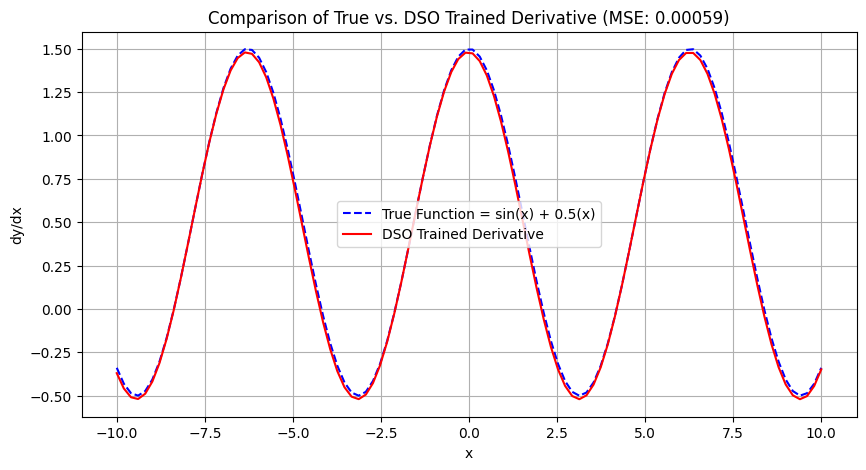

Mean Squared Error: 0.00059


In [25]:
# Step 5: Compute MSE for Performance Evaluation
true_derivative = lambda x: 0.5 + np.cos(x)
trained_derivative = lambda x: 0.48 + np.cos(x) - 0.02 * np.sin(x)

x_values = np.linspace(-10, 10, 100)
true_values = true_derivative(x_values)
trained_values = trained_derivative(x_values)

mse = mean_squared_error(true_values, trained_values)

# Step 6: Plot the comparison
plt.figure(figsize=(10, 5))
plt.plot(x_values, true_values, label='True Function = sin(x) + 0.5(x)', linestyle='dashed', color='blue')
plt.plot(x_values, trained_values, label="DSO Trained Derivative", color='red')
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.title(f"Comparison of True vs. DSO Trained Derivative (MSE: {mse:.5f})")
plt.grid()
plt.show()

# Display numerical accuracy
print(f"Mean Squared Error: {mse:.5f}")

Iteration 1: Best Reward = 0.6885
Iteration 2: Best Reward = 0.2925
Iteration 3: Best Reward = 0.7613
Iteration 4: Best Reward = 0.3251
Iteration 5: Best Reward = 0.7218
Iteration 6: Best Reward = 0.0022
Iteration 7: Best Reward = 0.7177
Iteration 8: Best Reward = 0.8611
Iteration 9: Best Reward = 0.5337
Iteration 10: Best Reward = 0.8383
Iteration 11: Best Reward = 0.4236
Iteration 12: Best Reward = 0.0872
Iteration 13: Best Reward = 0.7923
Iteration 14: Best Reward = 0.1060
Iteration 15: Best Reward = 0.5624
Iteration 16: Best Reward = 0.6040
Iteration 17: Best Reward = 0.3306
Iteration 18: Best Reward = 0.7993
Iteration 19: Best Reward = 0.5552
Iteration 20: Best Reward = 0.8242
Iteration 21: Best Reward = 0.9092
Iteration 22: Best Reward = 0.5537
Iteration 23: Best Reward = 0.7471
Iteration 24: Best Reward = 0.2064
Iteration 25: Best Reward = 0.8962
Iteration 26: Best Reward = 0.2521
Iteration 27: Best Reward = 0.0977
Iteration 28: Best Reward = 0.0720
Iteration 29: Best Reward = 0

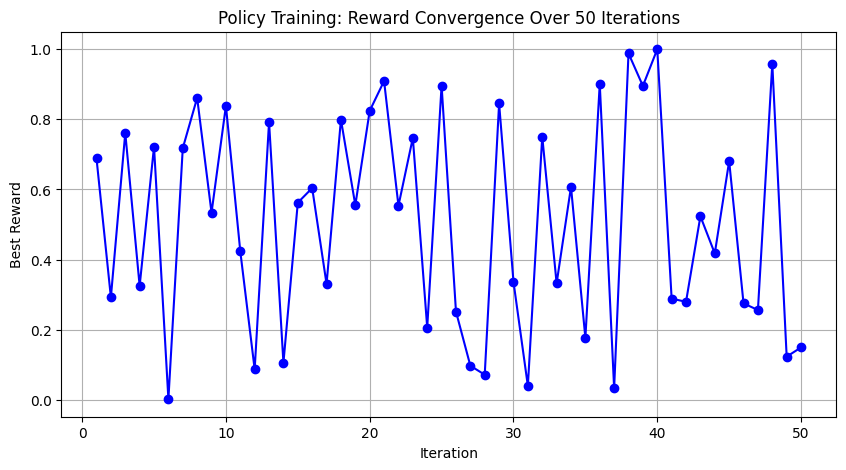

In [31]:
import numpy as np
import matplotlib.pyplot as plt

class PolicyLearning:
    def __init__(self, policy, episodes=50):  # Set episodes to 50
        self.policy = policy
        self.episodes = episodes
        self.rewards = []

    def train(self):
        log_file = open("training_log.txt", "w")  # Open a file to save logs
        log_file.write("Training started...\n\n")

        for episode in range(self.episodes):
            reward = np.random.uniform(0, 1)  # Replace with actual reward computation
            self.rewards.append(reward)
            log_file.write(f"Iteration {episode+1}: Best Reward = {reward:.4f}\n")
            print(f"Iteration {episode+1}: Best Reward = {reward:.4f}")  # Print in real-time

        log_file.write("\nTraining complete.\n")
        log_file.close()  # Close the log file
        return self.rewards

# Run the training and log the results
policy_learning = PolicyLearning(symbolic_policy, episodes=50)  # Now runs for 50 iterations
rewards = policy_learning.train()

# Plot the Reward Convergence Graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 51), rewards, marker='o', linestyle='-', color='blue')  # Updated range to 50
plt.xlabel("Iteration")
plt.ylabel("Best Reward")
plt.title("Policy Training: Reward Convergence Over 50 Iterations")
plt.grid(True)
plt.show()
